# ESD_thermotrace - parameter study


## Import libraries

In [1]:
# import all libraries and functions
from ESD_thermotrace_functions import *

# display plots below the related cell
%matplotlib inline
# # Alternatively, open an interactive window for every figure
# %matplotlib notebook 

# set white background and large fontsize for all plots
sns.set(style='white', context='talk')

## Make a table of x, y, z, age, error, erosion

In [2]:
ipf = 'input_highsierra'
opf = 'other_plots_data'
ws_data_filename = 'xyz_age_eros_noscenarios.xlsx'
f_map_filename = None
detrital_ages_filenames = ['dd_inyo_fine.xlsx']
ws_data = pd.read_excel(opf+'/'+ws_data_filename)

# Here you can play around with other erosional functions; first define one,
# then create the related column like this example:

# def E_stepwise(z, z_steps, weights):
#     '''
#     example erosional function of z, where prescribed erosional weights
#     are assigned for certain elevation ranges
#     z: elevation at which erosional weight is assigned
#     z_steps: list of elevation thresholds, ascending
#     weights: list of corresponding erosional weights
#     '''
#     if z>z_steps[-1]:
#         warnings.warn('also elevations above {} have been assigned {} \
#         as erosional weight'.format(z_steps[-1], weights[-1]))
#         return weights[-1]
#     else:
#         z_steps_a = np.array(z_steps)
#         return weights[z_steps.index(z_steps_a[z<z_steps_a][0])]

# e_steps = [3000,4000]
# e_weights = [2,1]
# ws_data['E<3000'] = ws_data.z.apply(lambda z: E_stepwise(z,e_steps,e_weights))
# ws_data['E<3000'] = ws_data['E<3000']/ws_data['E<3000'].min()

# e_steps = [3000,4000]
# e_weights = [1,2]
# ws_data['E>3000'] = ws_data.z.apply(lambda z: E_stepwise(z,e_steps,e_weights))
# ws_data['E>3000'] = ws_data['E>3000']/ws_data['E>3000'].min()
    
# steps = np.array([2500,3000,3500,4000])
# for i,el in enumerate(steps):
#     weights = np.array([1,1,1,1])
#     weights[steps==el] = 2
#     if i>0:
#         key = 'E'+str(steps[i-1])+'-'+str(el)
#     else:
#         key = 'E<'+str(el)
#     ws_data[key] = ws_data.z.apply(lambda z: E_stepwise(z,steps.tolist(),weights.tolist()))
#     ws_data[key] = ws_data[key]/ws_data[key].min()

def E_gauss(zarray,loc,Eratio,dev=500):
    '''
    Function to make a Gaussian distribution of erosion for a scenario with
    given Eratio (Emax/Emin),
    given the location of erosional focus (loc),
    given the array of positions (zarray)
    the 1sigma (dev) of the distribution by default is 500 meters (controls how wide is the peak)
    '''
    m = 1/(Eratio-1) # value at which the Gaussian curve gets flat (peak = 1)
    dist = (np.exp((-(zarray-loc)**2)/(dev)**2)+m)/(1+m) # after Nibourel et al. (2015)
    return dist/dist.min() # min must =1

locs = np.arange(2000,4000,100) # at which elevetion should the erosional peak occur?
Eratios = np.ones(locs.size)*2 # how many times larger than the minimum? ######################################
std = 500 # 1 sigma of bell curve, determines the width of the peak ############################################

labels=[] # list of scenario labels (in form of pdf)
for Zi in locs:
    for E in Eratios:
        label = 'E'+str(Zi)
        ws_data[label] = E_gauss(ws_data.z,Zi,E,dev=std)
        
# # PRESCRIBE AGE UNCERTAINTY? ##################################################################################
# ws_data['age_u%'] = ws_data['age_u%'].apply(lambda x: 20) 

# save to excel and show
ws_data.to_excel(opf+'/ps_ws_data_temp.xlsx', index=False)

print('TABLE OF CATCHMENT DATA:')
ws_data

TABLE OF CATCHMENT DATA:


,x,y,z,age,age_u%,Euni,E2000,E2100,E2200,E2300,...,E3000,E3100,E3200,E3300,E3400,E3500,E3600,E3700,E3800,E3900
0,392425.296213,4.050343e+06,1987,20.577670,7.209987,1,1.999322,1.950199,1.834011,1.675696,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,392395.296213,4.050343e+06,1992,20.692490,7.167067,1,1.999742,1.954408,1.841063,1.684141,...,1.000669,1.000318,1.000138,1.000054,1.000020,1.000007,1.000002,1.000001,1.000000,1.000000
2,392425.296213,4.050313e+06,1994,20.738418,7.149899,1,1.999854,1.956044,1.843853,1.687510,...,1.000944,1.000449,1.000194,1.000077,1.000028,1.000009,1.000003,1.000001,1.000000,1.000000
3,392485.296213,4.050283e+06,1994,20.738418,7.149899,1,1.999854,1.956044,1.843853,1.687510,...,1.000944,1.000449,1.000194,1.000077,1.000028,1.000009,1.000003,1.000001,1.000000,1.000000
4,392395.296213,4.050313e+06,1997,20.807310,7.124147,1,1.999962,1.958444,1.848005,1.692553,...,1.001363,1.000649,1.000281,1.000112,1.000041,1.000014,1.000004,1.000001,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,390325.296213,4.047103e+06,3860,63.589245,3.191858,1,1.000000,1.000000,1.000001,1.000004,...,1.034832,1.091529,1.171842,1.283948,1.428471,1.595304,1.763021,1.902653,1.985699,1.993620
3246,390295.296213,4.047103e+06,3860,63.589245,3.191858,1,1.000000,1.000000,1.000001,1.000004,...,1.034832,1.091529,1.171842,1.283948,1.428471,1.595304,1.763021,1.902653,1.985699,1.993620
3247,390355.296213,4.047043e+06,3862,63.635173,3.193975,1,1.000000,1.000000,1.000001,1.000003,...,1.034133,1.090337,1.170006,1.281401,1.425319,1.591875,1.759841,1.900331,1.984738,1.994240
3248,390355.296213,4.047073e+06,3865,63.704065,3.197150,1,1.000000,1.000000,1.000000,1.000001,...,1.033100,1.088569,1.167276,1.277608,1.420611,1.586733,1.755051,1.896805,1.983238,1.995111


## Make grain populations for all erosion scenarios and related distributions

In [3]:
# ASSIGN PREFERRED VALUE FOR MULTIPLIER HERE #####################################################################
# This will affect the number of grains in each predicted detrital population,
# try starting with 1 and based on the plots re-run the code cell
multiplier = 1

# make dictionary of populations, one for each scenario
pops, scen_labels = make_pops_dict(opf+'/ps_ws_data_temp.xlsx', f_map_filename, multiplier)

# DEFINE REFERENCE SCENARIO HERE ##################################################################################
ref_scen = 'Euni' 
pops.move_to_end(ref_scen, last=False) # move ref_scen to first position in the dictionary

# also load the detrital data and make detrital populations
pops, dd, detr_labels = get_detr_pops(detrital_ages_filenames, pops, ipf)

# make dictionary of detrital distributions, one for each item of pops
dists = OrderedDict([(label, make_cdf(pop)) for label, pop in pops.items()])
    
# SPECIFY N. OF DETRITAL GRAIN AGES HERE ##########################################################################
num_grains = 52

# check if something detrital is there
if len(detrital_ages_filenames)<1:
    warnings.warn('\nYou have not specified any path to the detrital data.')

# # Plot distributions
# plot_distributions(pops, dists, ref_scen, detr_labels, opf+'/ps_distributions_.pdf', num_grains, show_DKW=True)

## Confidence in discerning between erosion scenarios and reference scenario as a function of sample size.

In [4]:
############################ DEFINE RANGE OF K VALUES AND N. OF ITERATIONS HERE ####################################
all_k = np.arange(30,150,5) # possible n. of dated grains (k) to consider
k_iter = 1000 # iterations per k value

# make dictionary of probabilities
probs = get_probabilities(pops, dists, all_k, k_iter, scen_labels, ref_scen)

In [26]:
# Plot the confidence as function of sample size
# plot_confidence(probs, all_k, ref_scen, opf+'/ps_confidence_plot.pdf', len(dists))

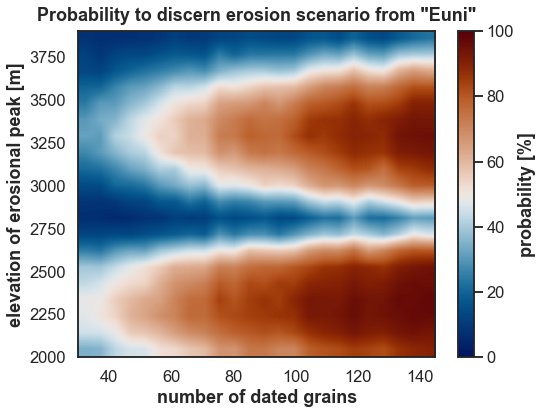

In [5]:
# make probability map
probmap = np.array([[probs['E'+str(Zi)][i] for i in np.arange(all_k.size)] for Zi in locs])
probmap = probmap[::-1]

# save probability map?
# np.savetxt(opf+'/probmap_array_5_1s20.csv', probmap)

# plot probability map
fig,ax = plt.subplots(figsize=(8,6))
im = ax.imshow(probmap,
               cmap=scm6.vik,
               vmin=0, vmax=100,
               extent=(all_k[0],all_k[-1],locs[0],locs[-1]),
               aspect='auto',
               interpolation='bilinear'
              )

ax.set_xlabel('number of dated grains', fontdict={'weight':'bold'})
ax.set_ylabel('elevation of erosional peak [m]', fontdict={'weight':'bold'})
ax.set_title('Probability to discern erosion scenario from "Euni"', pad=10, fontdict={'weight':'bold'})

cbar = plt.colorbar(im)
cbar.set_label('probability [%]', fontdict={'weight':'bold'})

# fig.savefig(opf+'/probability_map_gaussian_peaks_1s20_g100.pdf', dpi=200)

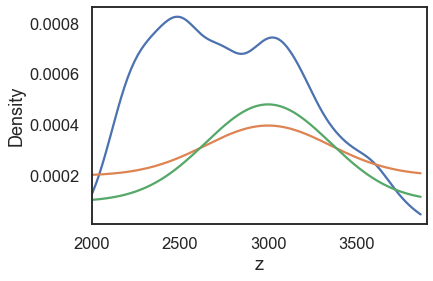

In [6]:
fig,ax = plt.subplots()
sns.kdeplot(ws_data.z, ax=ax, cut=0)
ax.set(xlim=(2000,3900))
ax.plot(ws_data.z, ws_data.E3000/ws_data.E3000.sum())
ax.plot(ws_data.z, x5)
# ax.plot(ws_data.z, ws_data.Euni/ws_data.Euni.sum())
# fig.savefig(opf+'/hypsometric_curve_g500.pdf', dpi=200)

## try plotting the confidence for a k_i against hipsometry

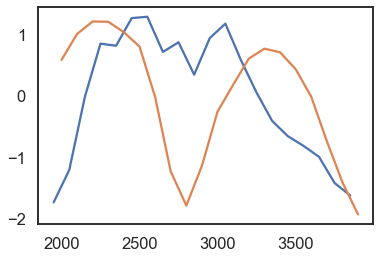

In [73]:
# get mean confidence at locations locs
Y = np.array([probmap[i,:].mean() for i in np.arange(probmap.shape[0])])
# normalize
Y = [(i-Y.mean())/Y.std() for i in Y]

# make pdf of Z, binning according to locs
Z = ws_data.z.values
qnt_binned = np.array([Z[Z<L].size/Z.size for L in locs])
qnt_w0 = np.append(np.zeros(1),qnt_binned)
pdf = np.array([v-qnt_w0[i] for i,v in enumerate(qnt_binned)])
pdf1 = [(i-pdf.mean())/pdf.std() for i in pdf]

plt.plot(locs-50,pdf1)
plt.plot(locs,Y[::-1]) # Y plotted upside down, to match locs

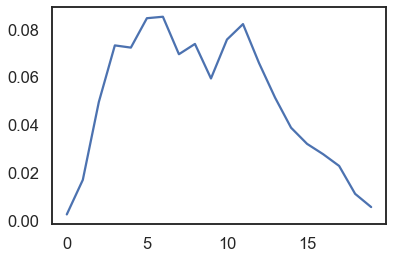

In [74]:
plt.plot(pdf)

In [77]:
4500*0.65

2925.0